# Instructor: Alfonso Berumen
## Pepperdine University
## ISTM 660

#**Setting up the initial notebook**
####Import Python packages

In [ ]:
#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import graphviz

#for statstical testing
import scipy.stats as stats

In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

{}

In [ ]:
#Python dataset
Fina = pd.read_csv('/content/Fina.csv');

In [ ]:
#how many records are in it?
print("Number of samples: %d" % len(Fina))

Number of samples: 15


In [ ]:
#what's in it?
Fina.head()

,Data,B_Qty,C_Qty,D_Qty,E_Qty,F_Qty,G_Qty,Product_B,Product_C,Product_D,...,Reagent_E,Reagent_F,Reagent_G,Cons_Total,customer_1,customer_5,customer_11,customer_14,customer_17,Total_SQ_PC
0,1-Jan-19,2,0,22,13,6,2,2000000,0,5940000,...,806448.0,278785.3,14629.5,16492761.4,15543119,3713000,1302856,1421490,1125999,25895340
1,1-Apr-19,3,0,25,0,0,1,3000000,0,6750000,...,453525.8,126188.0,0.0,16779831.6,16168168,3819028,2271309,1395880,2948214,29557736
2,1-Jul-19,0,0,46,1,9,4,0,0,12420000,...,441092.4,355355.6,0.0,16746946.0,19478534,1397282,3033029,600171,369660,28015719
3,1-Oct-19,7,0,4,3,20,1,7000000,0,1080000,...,1200024.4,403370.6,17377.9,17112714.6,18174553,2946175,1274149,1187931,21067,26729096
4,1-Jan-20,0,0,13,2,1,1,0,0,3510000,...,277061.9,80378.9,0.0,21853663.5,20098973,2043207,1508007,2124308,1410110,29205905


In [ ]:
#describe the data
Fina.describe

<bound method NDFrame.describe of         Data  B_Qty  C_Qty  D_Qty  E_Qty  F_Qty  G_Qty  Product_B  Product_C  \
0   1-Jan-19      2      0     22     13      6      2    2000000          0   
1   1-Apr-19      3      0     25      0      0      1    3000000          0   
2   1-Jul-19      0      0     46      1      9      4          0          0   
3   1-Oct-19      7      0      4      3     20      1    7000000          0   
4   1-Jan-20      0      0     13      2      1      1          0          0   
5   1-Apr-20      0      0      6      0     14      2          0          0   
6   1-Jul-20      3      1     26      0      0      0    3000000     320000   
7   1-Oct-20      2      0     27      2      2      0    2000000          0   
8   1-Jan-21      3      0     41      3      6      0    3000000          0   
9   1-Apr-21      2      0     49      0     17      3    2000000          0   
10  1-Jul-21      1      1     42      2     11      0    1000000     320000   
11  1-

In [ ]:
#more packages
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#scatter matrix
pd.plotting.scatter_matrix(Fina)
plt.show()

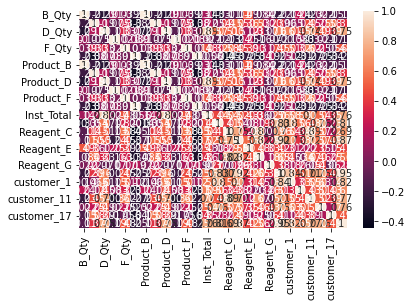

In [ ]:
#correlation matrix
corrMatrix = Fina.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

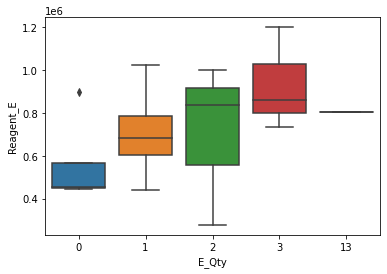

In [ ]:
#better for binary and continuous variable
boxplot = sn.boxplot(x="E_Qty", y="Reagent_E", data=Fina)
boxplot

In [ ]:
import scipy.stats as stats

In [ ]:
stats.ttest_ind(Fina['B_Qty'][Fina['Reagent_B'] == 1],
                Fina['B_Qty'][Fina['Reagent_B'] == 0], equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
import researchpy as rp

In [ ]:
rp.ttest(group1= Fina['Total_SQ_PC'][Fina['Inst_Total'] == 1], group1_name= "Sales_Rep=1",
         group2= Fina['Total_SQ_PC'][Fina['Inst_Total'] == 0], group2_name= "Sales_Rep=0")

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(      Variable    N  Mean  SD  SE  95% Conf.  Interval
 0  Sales_Rep=1  0.0   NaN NaN NaN        NaN       NaN
 1  Sales_Rep=0  0.0   NaN NaN NaN        NaN       NaN
 2     combined  0.0   NaN NaN NaN        NaN       NaN,
                           Independent t-test  results
 0  Difference (Sales_Rep=1 - Sales_Rep=0) =       NaN
 1                      Degrees of freedom =      -2.0
 2                                       t =       NaN
 3                   Two side test p value =       NaN
 4                  Difference < 0 p value =       NaN
 5                  Difference > 0 p value =       NaN
 6                               Cohen's d =       NaN
 7                               Hedge's g =       NaN
 8                          Glass's delta1 =       NaN
 9                        Point-Biserial r =       NaN)

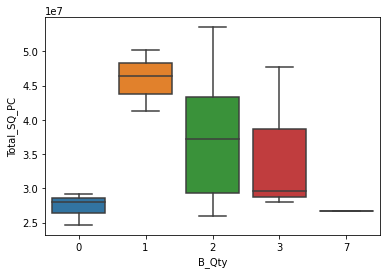

In [ ]:
boxplot = sn.boxplot(x="B_Qty", y="Total_SQ_PC", data=Fina)
boxplot

In [ ]:
#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

In [ ]:
#model
est = smf.ols('Total_SQ_PC ~ customer_1 + customer_5 + customer_11 + customer_14 + customer_17 ',Fina).fit()
est.summary().tables[1]

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.96e+06,4.02e+06,-0.736,0.480,-1.21e+07,6.14e+06
customer_1,1.2268,0.244,5.023,0.001,0.674,1.779
customer_5,1.3635,0.619,2.203,0.055,-0.037,2.763
customer_11,1.4789,0.582,2.543,0.032,0.163,2.795
customer_14,1.4038,0.643,2.183,0.057,-0.051,2.859
customer_17,1.7201,0.625,2.754,0.022,0.307,3.133


In [ ]:
#get standard output
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_SQ_PC   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     3.664
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0472
Time:                        16:02:49   Log-Likelihood:                -252.71
No. Observations:                  15   AIC:                             519.4
Df Residuals:                       8   BIC:                             524.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.139e+07   5.95e+06      3.595      0.007    7.67e+06    3.51e+07
Product_B      0.3106      1.208      0.257      0.804      -2.474       3.095
Product_C      2.1768      5.654      0.385      0.710     -10.861      15.215
Product_D      1.7534      0.525      3.337      0.010       0.542       2.965
Product_E     -2.3821      4.860     -0.490      0.637     -13.590       8.826
Product_F      5.1077      4.640      1.101      0.303      -5.592      15.807
Product_G   -194.1009    167.736     -1.157      0.281    -580.900     192.698
==============================================================================
Omnibus:                        0.095   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.111
Skew:                           0.100   Prob(JB):                        0.946
Kurtosis:                       2.629   Cond. No.                     3.00e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None 

Fina['yhat'] = pred #predicted values
Fina['resid'] = resid #residual values

In [ ]:
Fina.head()

,Data,B_Qty,C_Qty,D_Qty,E_Qty,F_Qty,G_Qty,Product_B,Product_C,Product_D,...,Reagent_G,Cons_Total,customer_1,customer_5,customer_11,customer_14,customer_17,Total_SQ_PC,yhat,resid
0,1-Jan-19,2,0,22,13,6,2,2000000,0,5940000,...,14629.5,16492761.4,15543119,3713000,1302856,1421490,1125999,25895340,2.702988e+07,-1.134535e+06
1,1-Apr-19,3,0,25,0,0,1,3000000,0,6750000,...,0.0,16779831.6,16168168,3819028,2271309,1395880,2948214,29557736,3.247202e+07,-2.914282e+06
2,1-Jul-19,0,0,46,1,9,4,0,0,12420000,...,0.0,16746946.0,19478534,1397282,3033029,600171,369660,28015719,2.880532e+07,-7.895963e+05
3,1-Oct-19,7,0,4,3,20,1,7000000,0,1080000,...,17377.9,17112714.6,18174553,2946175,1274149,1187931,21067,26729096,2.694166e+07,-2.125645e+05
4,1-Jan-20,0,0,13,2,1,1,0,0,3510000,...,0.0,21853663.5,20098973,2043207,1508007,2124308,1410110,29205905,3.212112e+07,-2.915213e+06


In [ ]:
print(Fina['yhat'])

0     2.702988e+07
1     3.247202e+07
2     2.880532e+07
3     2.694166e+07
4     3.212112e+07
5     2.409669e+07
6     2.803451e+07
7     2.716814e+07
8     4.766872e+07
9     5.375202e+07
10    4.292876e+07
11    3.335925e+07
12    5.056671e+07
13    4.019998e+07
14    4.584980e+07
Name: yhat, dtype: float64


In [ ]:
#same as above?
checkpred=298.4881+-28.5354*goodbelly['Average_Retail_Price']+77.4369*goodbelly['Sales_Rep']+305.1021*goodbelly['Endcap']+111.1328*goodbelly['Demo']+73.5172*goodbelly['Demo1_3']+67.5698*goodbelly['Demo4_5']+-1.5942*goodbelly['Natural']+-1.0197*goodbelly['Fitness']
checkpred.head()

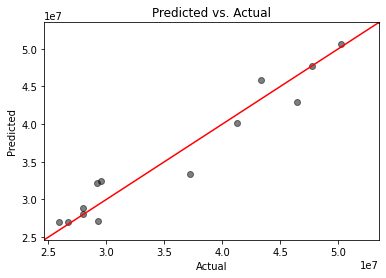

In [ ]:
#plot the actual and predicted
#add a line
lineStart = Fina.Total_SQ_PC.min() 
lineEnd = Fina.Total_SQ_PC.max()
plt.figure()
plt.scatter(Fina['Total_SQ_PC'],Fina['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

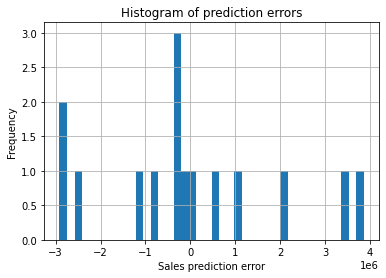

In [ ]:
#residual
residcalc = Fina['Total_SQ_PC'] - Fina['yhat']
residcalc.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Sales prediction error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Mean Squared Error 
from sklearn.metrics import mean_squared_error
mean_squared_error(Fina['Total_SQ_PC'], Fina['yhat'], squared=True)

3884764942787.807

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(Fina['Total_SQ_PC'], Fina['yhat'], squared=False) #squared = False will return the RMSE

1970980.7058385445

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Fina['Total_SQ_PC'], Fina['yhat'])

1484817.5539632945

In [ ]:
#Mean Absolute Percentage Error 
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Fina['Total_SQ_PC'], Fina['yhat'])

0.04338218458042438

In [ ]:
#model
est2 = smf.ols('Units_Sold ~ Average_Retail_Price + Sales_Rep + Endcap + Demo + Demo1_3 + Demo4_5',goodbelly).fit()
est2.summary()

# Movies Data Analysis

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

{}

In [ ]:
#Python dataset
Fina = pd.read_csv('/content/Fina.csv');

In [ ]:
#print first several records
Fina.head()

In [ ]:
F.describe

In [ ]:
F.info()

In [ ]:
#install profiling package-need to run this once
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
#run the profile report
profile = ProfileReport(Fina,title="Bio Tech")
profile.to_notebook_iframe()

In [ ]:
#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

In [ ]:
est = smf.ols('Total_SQ_PC ~ Product_B + Product_C + Product_D + Product_E + Product_F + Product_G ',Fina).fit()

In [ ]:
est2 = smf.ols('Total_SQ_PC ~ Reagent_B + Reagent_C + Reagent_D + Reagent_E + Reagent_F + Reagent_G ',Fina).fit()

In [ ]:
est3 = smf.ols('Total_SQ_PC ~ Inst_Total + Cons_Total ',Fina).fit()

In [ ]:
#model
est4 = smf.ols('Total_SQ_PC ~ customer_1 + customer_5 + customer_11 + customer_14 + customer_17 ',Fina).fit()

In [ ]:
#get standard output
est4.summary()

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None 

Fina['yhat'] = pred #predicted values
Fina['resid'] = resid #residual values

In [ ]:
#plot the actual and predicted
#add a line
lineStart = Fina.Total_SQ_PC.min() 
lineEnd = Fina.Total_SQ_PC.max()
plt.figure()
plt.scatter(Fina['Total_SQ_PC'],Fina['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [ ]:
#residual
residcalc = Fina['Total_SQ_PC'] - Fina['yhat']
residcalc.hist(bins = 20)
plt.title('Histogram of prediction errors')
plt.xlabel('Sales prediction error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
#QQ PLOT
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(est.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

In [ ]:
import seaborn as sn

In [ ]:
sn.residplot(x = 'yhat', y= 'Total_SQ_PC', data=Fina, lowess = True)

plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)

In [ ]:
sn.regplot(est.fittedvalues, 
           np.sqrt(np.abs(est.get_influence().resid_studentized_internal)), 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
          scatter_kws={'facecolors':'none', 'edgecolors':'black'})

plt.title('Scale-Location', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)

In [ ]:
movies_nona = Fina[Fina['yhat'].notna()]

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(movies_nona['Total_SQ_PC'], movies_nona['yhat'], squared=True)

25189258646840.176

In [ ]:
#install R packages
%%R
install.packages("ggplot2")
install.packages("leaps")
install.packages("MASS")
install.packages("tidyverse")
install.packages("lubridate")

UsageError: Cell magic `%%R` not found.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


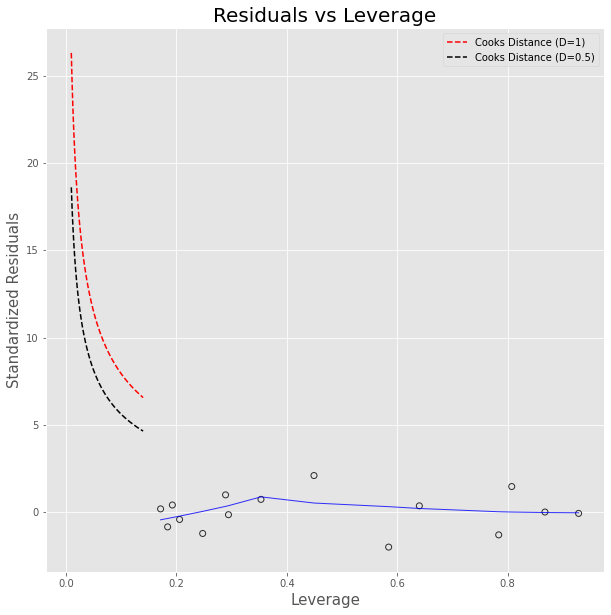

In [ ]:
from numpy import sqrt

def one_line(x):
    return sqrt((1 * len(est.params) * (1 - x)) / x)

def point_five_line(x):
    return sqrt((0.5 * len(est.params) * (1 - x)) / x)
    
    
    
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    
        

sn.regplot(est.get_influence().hat_matrix_diag, 
           est.get_influence().resid_studentized_internal, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
          scatter_kws={'facecolors':'none', 'edgecolors':'black'})

show_cooks_distance_lines(one_line,
                        np.linspace(.01,.14,100),
                          'red',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(.01,.14,100),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.title('Residuals vs Leverage', fontsize=20)
plt.xlabel('Leverage', fontsize=15)
plt.ylabel('Standardized Residuals', fontsize=15)
plt.legend()